<a href="https://colab.research.google.com/github/aadyakoirala/analytics-projects/blob/main/HousePrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting House Prices

# Business Framing & Problem Statement
This project addresses a supervised regression problem: predicting the sale price of residential homes based on a variety of physical and locational features. The dataset, drawn from the Kaggle competition House Prices: Advanced Regression Techniques, includes variables such as lot size, number of rooms, neighborhood, and overall quality — all of which are potential drivers of housing value.The features represent different attributes of the houses, and the target variable is the final sale price.

This dataset is part of an ongoing Kaggle competition titled  https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques, and the dataset can be accessed here. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

# Business Context
Imagine I am a data analyst at a real estate investment firm that specializes in residential property acquisitions. The firm seeks to enhance its pricing strategy by leveraging predictive modeling to estimate the fair market value of homes based on historical sales data and property characteristics.

The goal is to build a regression model that can accurately predict house prices using historical sales data. This model will help the firm:

Identify undervalued properties
Set competitive listing prices
Evaluate investment opportunities across neighborhoods
By integrating this model into the firm's decision-making process, we aim to improve pricing accuracy, reduce risk, and uncover profitable investment opportunities.

Linear Regression was chosen because the target variable SalePrice is continuous, representing housing prices in dollars. Logistic Regression is designed for classification tasks with categorical or binary outcomes (e.g., predicting whether a house sells above or below a threshold). Since the goal of this analysis is to predict actual sale prices rather than categories, Linear Regression and its regularized variant (LASSO) are the appropriate modeling choices.

 ## Exploring and Preparing the Data
 We start by loading and exploring the data. The exporation is going to be key in informing our modeling process.

## Loading Data
Let's load relevant packages and the data:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The training data for this project is stored in a CSV file hosted on GitHub. For simplicity, we begin by loading a single training set. If the dataset were split across multiple files, we would need to concatenate them to form the full training set. In this case, we are using one complete file.

In [ ]:
url = 'https://raw.githubusercontent.com/aadyakoirala/aadyakoirala/main/train.csv'
house_prices_train= pd.read_csv(url)


We rely on the training set to build our model. So, "traning set" is a bit of a misnomer, because this is the data we will have to use to build (select) and train our model.

Let's take a look:

In [ ]:
house_prices_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The modeling task is to predict the sale price of residential homes based on their physical and locational features. In addition to the training set, we are provided with a test set that does not include sale prices. The goal is to generate predictions for these homes using a trained model, and format the results for submission.

In [ ]:
url = 'https://raw.githubusercontent.com/aadyakoirala/aadyakoirala/refs/heads/main/test.csv'
house_prices_test = pd.read_csv(url)
house_prices_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We are provided with a test set that does not include sale prices. The task is to generate predictions for these homes using the trained model. The submission file should contain the predicted SalePrice for each observation in the test set, formatted according to the sample submission file provided.

In [ ]:
url = 'https://raw.githubusercontent.com/aadyakoirala/aadyakoirala/refs/heads/main/sample_submission.csv'
house_prices_sample = pd.read_csv(url)
house_prices_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Let's explore the training set a bit. Let's first look at some basic information:

In [ ]:
house_prices_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house_prices_train.shape

(1460, 81)

In [ ]:
house_prices_train.info()
house_prices_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
house_prices_train.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

So, there are thirty eight numerical features in additional to the target: including saleprice The other variables are categorical. Let's check all the levels for the categorical variables:

In [ ]:
for column in house_prices_train.select_dtypes(include=['object']):
    print(f"{column}: {house_prices_train[column].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['Vi

## Data Inspection Summary


To inform the cleaning and modeling process, I conducted a structured inspection of the dataset's structure, types, and content.

1. Feature Types
- The dataset contains 81 columns and 1,460 rows.
- 38 numeric features were identified using select_dtypes, including:
- Continuous: LotArea, GrLivArea, SalePrice
- Discrete: OverallQual, GarageCars, TotRmsAbvGrd
- 43 categorical features were identified, such as:
- Low-cardinality: Street, CentralAir, PavedDrive
- High-cardinality: Neighborhood, Exterior1st, Exterior2nd


2.  Missing Values
- Several features contain missing values:
- High missingness: PoolQC (99.5%), MiscFeature (96.3%), Alley (93.8%)
- Moderate: LotFrontage, GarageYrBlt, MasVnrType, FireplaceQu, and    basement-related features


3. Categorical Levels
- Many categorical features have well-defined, interpretable levels:
- MSZoning: ['RL', 'RM', 'C (all)', 'FV', 'RH']
- Street: ['Pave', 'Grvl']
- Neighborhood: 25 unique values
- Some features include nan as a category, indicating missingness that may be meaningful (e.g., FireplaceQu, GarageType)


4. Outliers and Skew
- LotArea and GrLivArea show extreme values (e.g., max LotArea = 215,245)
- SalePrice is right-skewed, suggesting a log transformation may improve model performance


5. Data Quality
- No duplicate rows or IDs were found
- No negative or implausible values in key features
- Categorical values appear standardized (no typos or mixed casing)





So, we will have to deal with some missing data.

Preparing the Data
We have missing data---both in the training and test set. So, my preferred approach is to combine the data in the training and test sets. We set the average price of the training set as the price in the test set observations. We will add a label "R" to all the observations in the trainng set and "T" to all the observations in the test set:

In [ ]:
# Step 1: Calculate average SalePrice from training
average_price = house_prices_train['SalePrice'].mean()

# Step 2: Add label column
house_prices_train['Label'] = 'R'   # R = training
house_prices_test['Label'] = 'T'    # T = test

# Step 3: Set average SalePrice for test set
house_prices_test['SalePrice'] = average_price

# Step 4: Combine datasets
combined_data = pd.concat([house_prices_train, house_prices_test], axis=0)

# Step 5: Reset index
combined_data = combined_data.reset_index(drop=True)

# Step 6: Inspect combined data
print(combined_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  Label  
0       WD         Normal   208500

I calculated the average SalePrice from the training set and assigned it as a placeholder to the test set. I added a Label column to distinguish between training (R) and test (T) observations. Finally, I combined both datasets into one unified frame and reset the index. This combined dataset will be used for consistent preprocessing of missing values, encoding, and feature engineering.



While inspecting the combined dataset preview, I noticed NaN values in columns like Alley, PoolQC, and Fence. To systematically detect missing values, I used .isnull().sum() to count missing entries across all columns. This ensures I don't miss features with only a few missing values.


Some features in the dataset describe attributes that only exist for certain houses. For example:

- PoolQC → Pool quality (only houses with pools have this).
- Alley → Type of alley access (many houses don't have alleys).
- Fence → Fence quality (not every house has a fence).
- FireplaceQu → Fireplace quality (only houses with fireplaces).
- GarageType, GarageFinish, GarageQual, GarageCond → Garage details (missing if no garage).
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 → Basement details (missing if no basement).
 In these cases, missing values don't mean “data error” — they mean the feature is not applicable for that house.
So instead of filling with the mode or median, we assign a special category like "None" to indicate absence of the feature.


This way, the model can distinguish between:
- "None" = house doesn't have that feature
- "TA", "Gd", "Ex" = house has the feature with a certain quality



In [ ]:
# Optional categorical features: missing means feature absent
categorical_fill_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
for col in categorical_fill_none:
    combined_data[col] = combined_data[col].fillna('None')

# Numeric features: missing means no area/count
numeric_fill_zero = ['GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
for col in numeric_fill_zero:
    combined_data[col] = combined_data[col].fillna(0)

# Special numeric features
combined_data['LotFrontage'] = combined_data['LotFrontage'].fillna(combined_data['LotFrontage'].median())

# Core categorical features: fill with mode
categorical_fill_mode = ['MSZoning','KitchenQual','SaleType']
for col in categorical_fill_mode:
    combined_data[col] = combined_data[col].fillna(combined_data[col].mode()[0])

In [ ]:
combined_data.isnull().sum().sum()

np.int64(2997)

Some categorical features are optional — they only apply if the house has that attribute (e.g., pool, alley, fence, garage, basement). Missing values in these features indicate absence, not error. I imputed them with "None" to explicitly mark that the house does not have the feature.


In [ ]:
## - Drop Id (identifier, not useful for modeling):
combined_data = combined_data.drop('Id', axis=1)

## Missing values in Numeric column

In [ ]:
# Select only numeric columns
numeric_cols = combined_data.select_dtypes(include=['int64','float64']).columns

# Check missing values in numeric columns
numeric_missing = combined_data[numeric_cols].isnull().sum()
numeric_missing = numeric_missing[numeric_missing > 0].sort_values(ascending=False)

print("Numeric columns with missing values:\n")
print(numeric_missing)

Numeric columns with missing values:

GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
dtype: int64


## Fixing Missing values in Numeric Features

In [ ]:
# GarageYrBlt: fill missing with 0 (no garage)
combined_data['GarageYrBlt'] = combined_data['GarageYrBlt'].fillna(0)

# MasVnrArea: fill missing with 0 (no veneer)
combined_data['MasVnrArea'] = combined_data['MasVnrArea'].fillna(0)

# BsmtFullBath: fill missing with 0 (no basement bathroom)
combined_data['BsmtFullBath'] = combined_data['BsmtFullBath'].fillna(0)

# BsmtHalfBath: fill missing with 0 (no basement bathroom)
combined_data['BsmtHalfBath'] = combined_data['BsmtHalfBath'].fillna(0)

I imputed missing numeric values based on context. GarageYrBlt was set to 0 for houses without garages. MasVnrArea was set to 0 for houses without masonry veneer. BsmtFullBath and BsmtHalfBath were set to 0 for houses without basement bathrooms. This ensures all numeric features are complete and consistent.


In [ ]:
# Categorical imputation
cat_cols = combined_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)


/tmp/ipython-input-285745468.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)


In [ ]:
# Numeric imputation
num_cols = combined_data.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    combined_data[col].fillna(combined_data[col].median(), inplace=True)


/tmp/ipython-input-187591554.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[col].fillna(combined_data[col].median(), inplace=True)


In [ ]:
print(combined_data.isnull().sum().sum())  # should be 0

0


## Checking For Duplicate Rows

- Sometimes the same house record can appear more than once (especially after merging train and test).
- Duplicate rows can bias our model because they give extra weight to certain observations.
- Best practice: detect them, decide whether to drop them, or keep them if they're intentional.


In [ ]:
# Check if there are any duplicate rows in the combined dataset
duplicate_rows = combined_data[combined_data.duplicated()]

print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


I checked for duplicate rows using .duplicated(). The result showed 0 duplicates, which confirms that all records in the combined dataset are unique. No further action was needed for duplicate handling.


## Check Erroneous Numeric Values

In [ ]:
# Example checks for numeric erroneous values
print("LotFrontage < 0:", combined_data[combined_data['LotFrontage'] < 0].shape[0])
print("GarageYrBlt unrealistic:", combined_data[(combined_data['GarageYrBlt'] < 1800) | (combined_data['GarageYrBlt'] > 2025)].shape[0])
print("SalePrice <= 0:", combined_data[combined_data['SalePrice'] <= 0].shape[0])
print("GarageCars unrealistic:", combined_data[combined_data['GarageCars'] > 10].shape[0])
print("MasVnrArea < 0:", combined_data[combined_data['MasVnrArea'] < 0].shape[0])

LotFrontage < 0: 0
GarageYrBlt unrealistic: 160
SalePrice <= 0: 0
GarageCars unrealistic: 0
MasVnrArea < 0: 0


## Fixing GarageYrBlt


In [ ]:
# If GarageYrBlt is missing but garage exists, use YearBuilt
combined_data.loc[(combined_data['GarageYrBlt'] == 0) & (combined_data['GarageArea'] > 0),
                  'GarageYrBlt'] = combined_data['YearBuilt']

# Clip unrealistic values (e.g., > 2025 or < 1800) to YearBuilt
combined_data.loc[(combined_data['GarageYrBlt'] < 1800) | (combined_data['GarageYrBlt'] > 2025),
                  'GarageYrBlt'] = combined_data['YearBuilt']

I checked for erroneous numeric values. Most features were valid, but GarageYrBlt had 160 unrealistic entries. For houses without garages, I imputed GarageYrBlt as 0. For houses with garages but missing or unrealistic years, I replaced GarageYrBlt with the house's YearBuilt. This ensures all garage year values are logical and consistent.


##Check Erroneous Categorical Values

In [ ]:
# Example check for categorical erroneous values
print("Unique MSZoning values:", combined_data['MSZoning'].unique())
print("Unique KitchenQual values:", combined_data['KitchenQual'].unique())
print("Unique SaleType values:", combined_data['SaleType'].unique())

Unique MSZoning values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique KitchenQual values: ['Gd' 'TA' 'Ex' 'Fa']
Unique SaleType values: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


In [ ]:
# Strip whitespace and standardize casing for categorical columns
categorical_cols = ['MSZoning','KitchenQual','SaleType']
for col in categorical_cols:
    combined_data[col] = combined_data[col].str.strip()

I checked the categorical features (MSZoning, KitchenQual, and SaleType). All the values looked correct — there were no spelling mistakes or unexpected categories. To be safe, I cleaned the text by removing any extra spaces.



## Feature Engineering Steps
This step creates new, more informative variables that help models capture relationships better.
1. Total Bathrooms
Combine all bathroom counts into one feature:
- FullBath (above ground full baths)
- HalfBath (above ground half baths, count as 0.5)
- BsmtFullBath (basement full baths)
- BsmtHalfBath (basement half baths, count as 0.5)


In [ ]:
combined_data['TotalBathrooms'] = (
    combined_data['FullBath'] +
    combined_data['HalfBath']*0.5 +
    combined_data['BsmtFullBath'] +
    combined_data['BsmtHalfBath']*0.5
)

2. Total Square Footage
Aggregate all square footage features:
- TotalBsmtSF (basement)
- 1stFlrSF (first floor)
- 2ndFlrSF (second floor)


In [ ]:
combined_data['TotalSF'] = (
    combined_data['TotalBsmtSF'] +
    combined_data['1stFlrSF'] +
    combined_data['2ndFlrSF']
)

3. Age Features
Age often matters more than raw year:
- HouseAge = YrSold - YearBuilt
- RemodAge = YrSold - YearRemodAdd
- GarageAge = YrSold - GarageYrBlt (if garage exists)


In [ ]:
combined_data['HouseAge'] = combined_data['YrSold'] - combined_data['YearBuilt']
combined_data['RemodAge'] = combined_data['YrSold'] - combined_data['YearRemodAdd']
combined_data['GarageAge'] = combined_data['YrSold'] - combined_data['GarageYrBlt']

4. Porch Area

Combine all porch-related features:

- OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch





In [ ]:
combined_data['TotalPorchSF'] = (
    combined_data['OpenPorchSF'] +
    combined_data['EnclosedPorch'] +
    combined_data['3SsnPorch'] +
    combined_data['ScreenPorch']
)

5. Encoding Categorical Variables

Models need numeric inputs, so categorical features must be encoded:

- Label Encoding for ordinal features (e.g., KitchenQual, ExterQual) where order matters.
- One-Hot Encoding for nominal features (e.g., MSZoning, SaleType) where categories are unordered.


In [ ]:
# Example: One-hot encode MSZoning
combined_data = pd.get_dummies(combined_data, columns=['MSZoning','SaleType'], drop_first=True)

# Example: Map KitchenQual (ordinal)
qual_map = {'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
combined_data['KitchenQual'] = combined_data['KitchenQual'].map(qual_map)

I engineered new features to improve model performance. TotalBathrooms and TotalSF aggregate related variables into more meaningful measures. Age features (HouseAge, RemodAge, GarageAge) capture temporal effects. TotalPorchSF combines all porch areas. Finally, categorical variables were encoded using one-hot encoding for nominal features and ordinal mapping for quality ratings.


In [ ]:
# Final check
combined_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      2919 non-null   int64  
 1   LotFrontage     2919 non-null   float64
 2   LotArea         2919 non-null   int64  
 3   Street          2919 non-null   object 
 4   Alley           2919 non-null   object 
 5   LotShape        2919 non-null   object 
 6   LandContour     2919 non-null   object 
 7   Utilities       2919 non-null   object 
 8   LotConfig       2919 non-null   object 
 9   LandSlope       2919 non-null   object 
 10  Neighborhood    2919 non-null   object 
 11  Condition1      2919 non-null   object 
 12  Condition2      2919 non-null   object 
 13  BldgType        2919 non-null   object 
 14  HouseStyle      2919 non-null   object 
 15  OverallQual     2919 non-null   int64  
 16  OverallCond     2919 non-null   int64  
 17  YearBuilt       2919 non-null   i

## Identify Categorical Columns

In [ ]:
cat_cols = combined_data.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition', 'Label'],
      dtype='object')


In [ ]:
combined_data = pd.get_dummies(
    combined_data,
    columns=['Street','Alley','LotShape','LandContour','Utilities','LotConfig',
             'LandSlope','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
             'MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2',
             'Heating','Electrical','Functional','GarageType','GarageFinish',
             'Fence','MiscFeature','SaleCondition'],
    drop_first=True
)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 230 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(174), float64(15), int64(29), object(12)
memory usage: 1.7+ MB


Handle Remaining object Columns


In [ ]:
# Ordinal quality mapping
quality_map = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for col in ['ExterQual','ExterCond','BsmtQual','BsmtCond',
            'HeatingQC','FireplaceQu','GarageQual','GarageCond','PoolQC']:
    combined_data[col] = combined_data[col].map(quality_map)

# Binary conversion
combined_data['CentralAir'] = combined_data['CentralAir'].map({'N':0, 'Y':1})

# PavedDrive (ordinal: N < P < Y)
combined_data['PavedDrive'] = combined_data['PavedDrive'].map({'N':0, 'P':1, 'Y':2})

# Label column stays as is (used later to split train/test)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 230 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(174), float64(17), int64(38), object(1)
memory usage: 1.7+ MB


Let's save the prepared data:

In [ ]:
combined_data.to_csv('data_to_ana.csv', index=False)

## Data Exploration Steps

In [ ]:
## Show first 10 rows
combined_data.head(10)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,True,True,False,False,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,True,True,False,False,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,True,True,False,False,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,True,True,False,False,False,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,True,True,False,False,False,False,False,False,True,False
5,50,85.0,14115,5,5,1993,1995,0.0,3,3,...,False,False,False,True,False,False,False,False,True,False
6,20,75.0,10084,8,5,2004,2005,186.0,4,3,...,True,True,False,False,False,False,False,False,True,False
7,60,68.0,10382,7,6,1973,1973,240.0,3,3,...,True,False,False,True,False,False,False,False,True,False
8,50,51.0,6120,7,5,1931,1950,0.0,3,3,...,True,True,False,False,False,False,False,False,False,False
9,190,50.0,7420,5,6,1939,1950,0.0,3,3,...,True,True,False,False,False,False,False,False,True,False


In our dataset, we observe that there are 229 predictor features along with SalePrice, which serves as the target variable. The predictors include both original numeric variables (e.g., LotArea, YearBuilt, OverallQual) and engineered features (e.g., TotalBathrooms, TotalSF, HouseAge), as well as categorical variables that have been converted into numeric form through ordinal mappings and one-hot encoding. As a result, the dataset now contains only numeric and boolean features, making it suitable for correlation analysis and regression modeling without further categorical transformations.



## Heatmap of Correlations with Corerelation coefficient

In [ ]:
# Drop non-numeric column
corr_matrix = combined_data.drop(columns=['Label']).corr()

# Sort correlations with SalePrice
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)

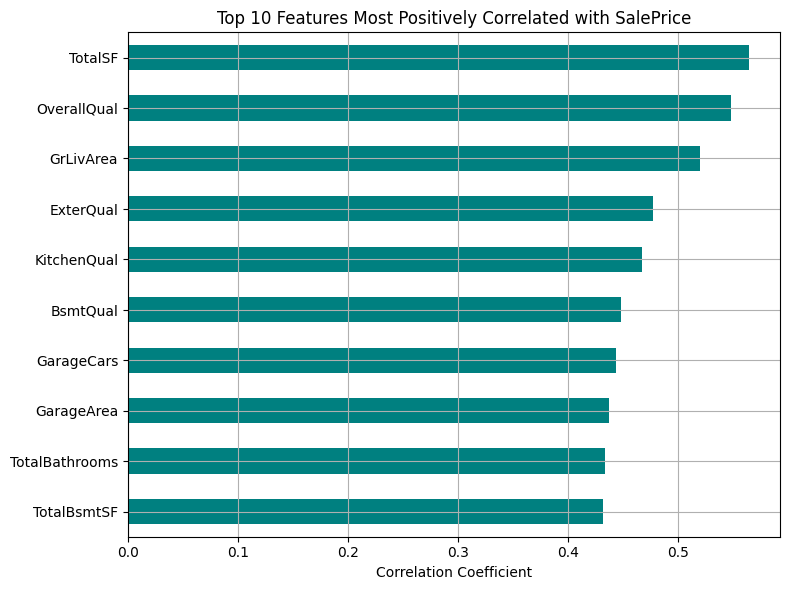

In [ ]:

# Exclude SalePrice itself (correlation = 1)
top_corr = corr_with_target[1:11]

plt.figure(figsize=(8,6))
top_corr.plot(kind='barh', color='teal')
plt.title('Top 10 Features Most Positively Correlated with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.gca().invert_yaxis()  # Highest at top
plt.grid(True)
plt.tight_layout()
plt.show()

##Full Heatmap of Correlations

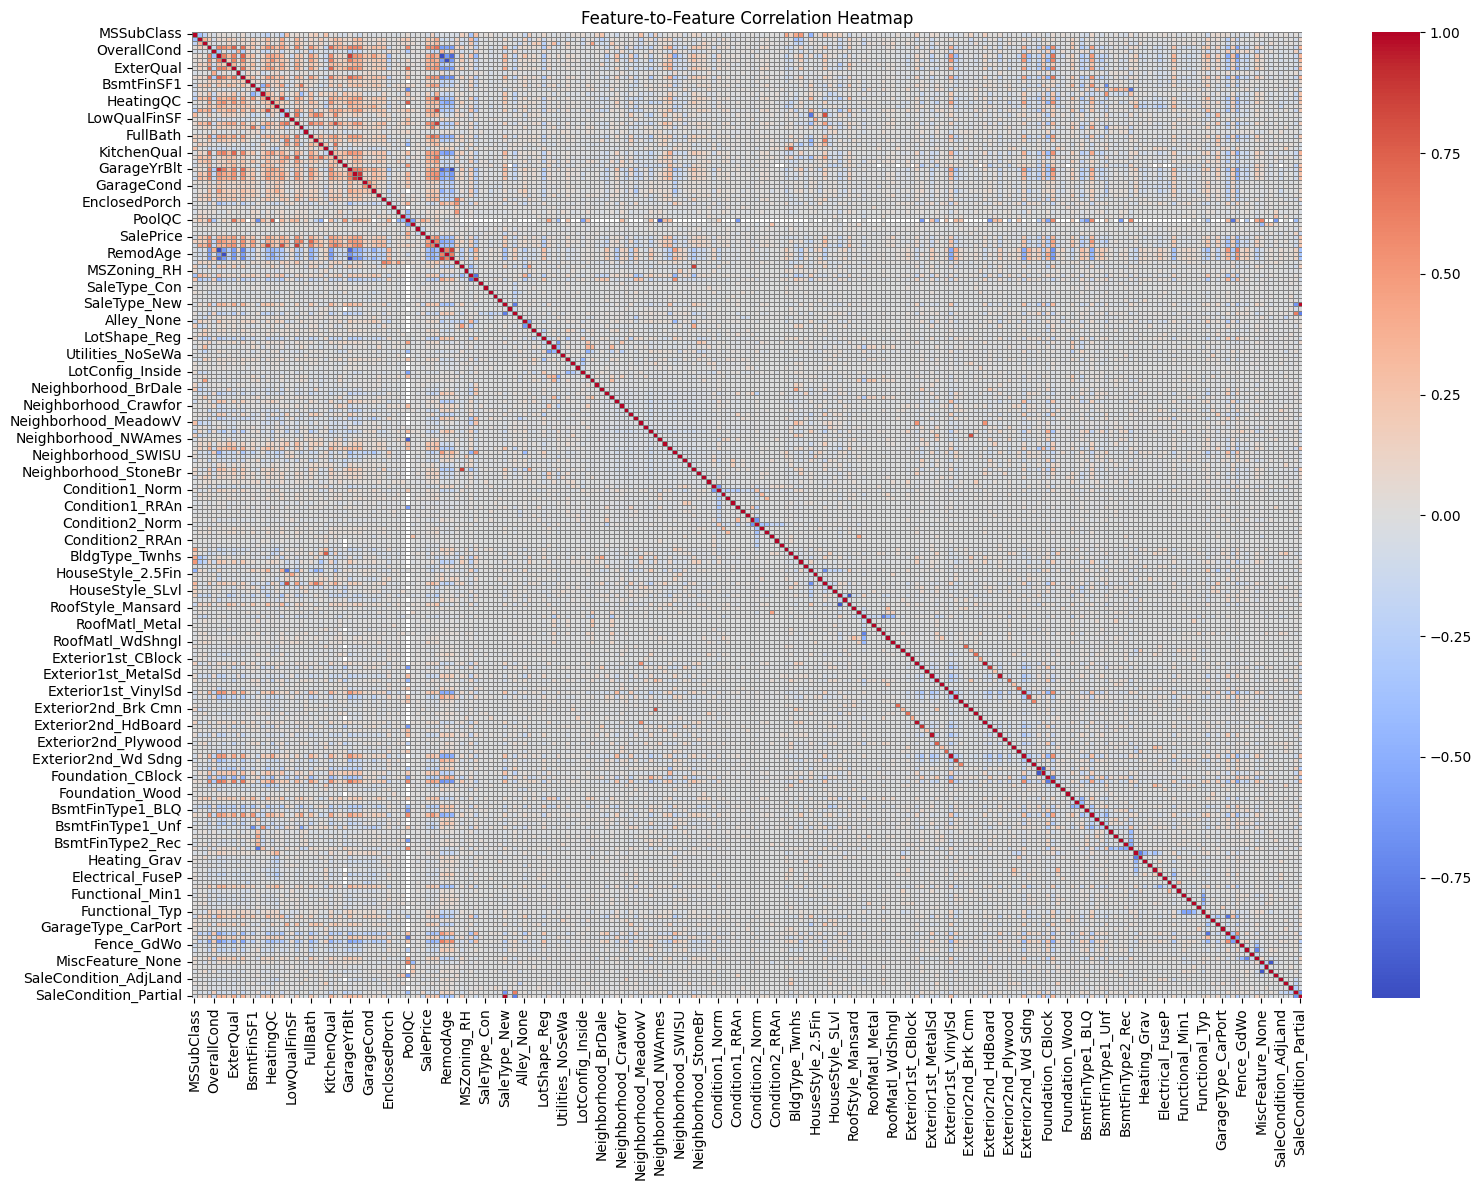

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric column
numeric_data = combined_data.drop(columns=['Label'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5, linecolor='gray')
plt.title('Feature-to-Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Drop non-numeric column
numeric_data = combined_data.drop(columns=['Label'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

In [ ]:
# Unstack the matrix into pairs
feature_corr = corr_matrix.unstack()

# Drop self-correlations (feature with itself = 1.0)
feature_corr = feature_corr[feature_corr < 0.9999]

# Take absolute values and sort
feature_corr = feature_corr.abs().sort_values(ascending=False)

# Show top 20 strongest feature-to-feature correlations
print(feature_corr.head(20))

HouseAge               YearBuilt                0.999060
YearBuilt              HouseAge                 0.999060
GarageAge              GarageYrBlt              0.998792
GarageYrBlt            GarageAge                0.998792
YearRemodAdd           RemodAge                 0.998019
RemodAge               YearRemodAdd             0.998019
SaleCondition_Partial  SaleType_New             0.986573
SaleType_New           SaleCondition_Partial    0.986573
Exterior2nd_CmentBd    Exterior1st_CemntBd      0.983411
Exterior1st_CemntBd    Exterior2nd_CmentBd      0.983411
Exterior2nd_VinylSd    Exterior1st_VinylSd      0.978188
Exterior1st_VinylSd    Exterior2nd_VinylSd      0.978188
Exterior2nd_MetalSd    Exterior1st_MetalSd      0.969712
Exterior1st_MetalSd    Exterior2nd_MetalSd      0.969712
MiscFeature_Shed       MiscFeature_None         0.949504
MiscFeature_None       MiscFeature_Shed         0.949504
MasVnrType_BrkFace     MasVnrType_Stone         0.948815
MasVnrType_Stone       MasVnrTy

The feature-to-feature correlation analysis revealed near-perfect redundancy among engineered variables (e.g., HouseAge vs YearBuilt, GarageAge vs GarageYrBlt). Dummy variables for exterior materials and roof styles also showed very high correlations, reflecting overlapping categorical encodings. To mitigate multicollinearity, redundant engineered features will be dropped, and regularization will be considered for categorical dummies.


## Drop Redundant Engineered Features

In [ ]:
combined_data = combined_data.drop(
    columns=[col for col in ['YearBuilt','GarageYrBlt','YearRemodAdd'] if col in combined_data.columns]
)

Even after dropping redundant engineered features, the correlation matrix still shows near-perfect relationships. This occurs because engineered features are mathematically tied to their originals, and dummy variables overlap by design. To address this, I verified column removal and will rely o

In [ ]:
# Drop Label column
numeric_data = combined_data.drop(columns=['Label'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Select top 20 features most correlated with SalePrice (excluding SalePrice itself)
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(21).index.tolist()
top_features.remove('SalePrice')  # exclude target from heatmap

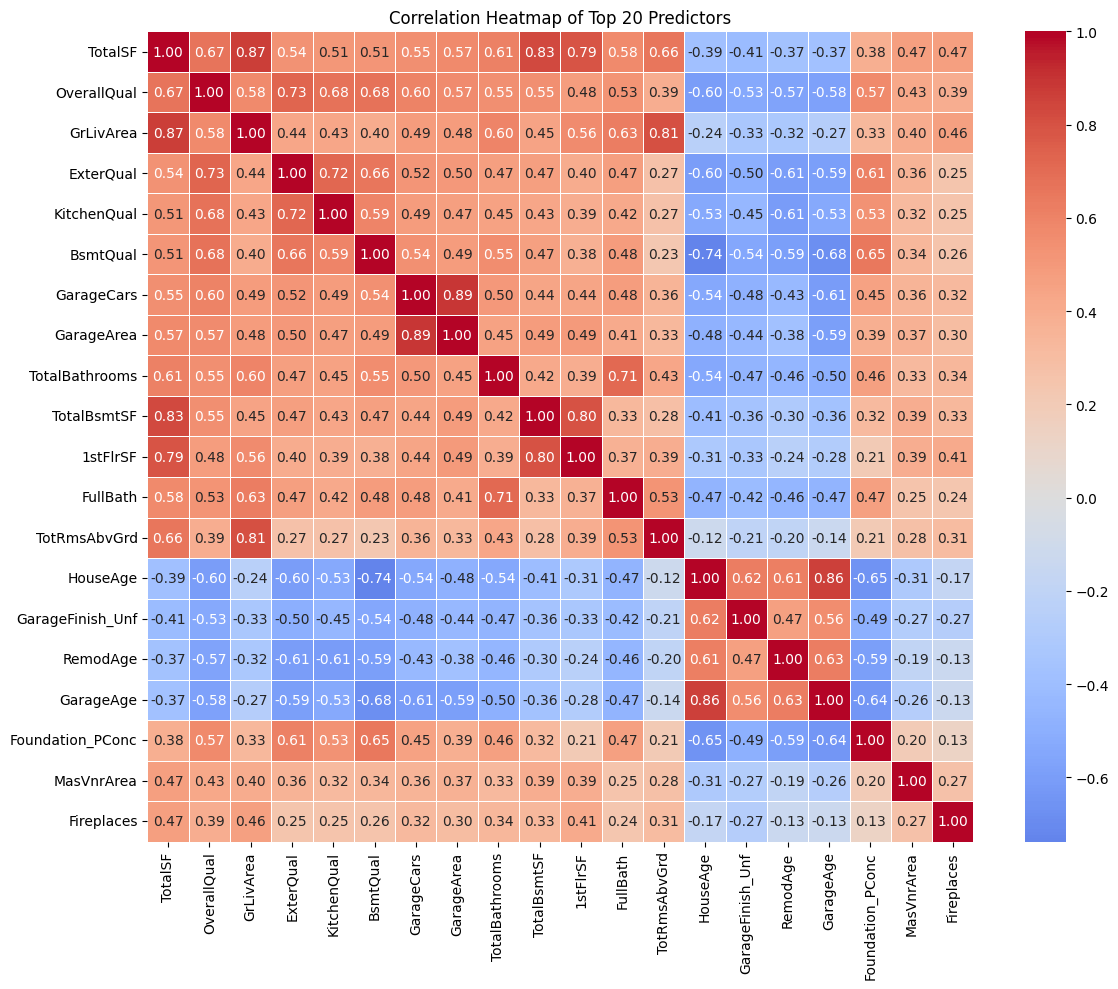

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix.loc[top_features, top_features],
            annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Top 20 Predictors')
plt.tight_layout()
plt.show()

In [ ]:
# Drop non-numeric column
numeric_data = combined_data.drop(columns=['Label'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Get absolute correlations with SalePrice
corr_with_target = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

# Show top 20 predictors (excluding SalePrice itself)
top_20_predictors = corr_with_target.drop('SalePrice').head(20)
print(top_20_predictors)

TotalSF             0.564542
OverallQual         0.548617
GrLivArea           0.520311
ExterQual           0.477697
KitchenQual         0.467535
BsmtQual            0.448282
GarageCars          0.443997
GarageArea          0.437293
TotalBathrooms      0.433755
TotalBsmtSF         0.431492
1stFlrSF            0.422097
FullBath            0.394977
TotRmsAbvGrd        0.390869
HouseAge            0.369015
GarageFinish_Unf    0.363212
RemodAge            0.355641
GarageAge           0.354201
Foundation_PConc    0.351628
MasVnrArea          0.337696
Fireplaces          0.329421
Name: SalePrice, dtype: float64


The top predictors of SalePrice include both size-related features (TotalSF, GrLivArea, GarageArea, TotalBathrooms) and quality-related features (OverallQual, KitchenQual, ExterQual, BsmtQual). Age and renovation variables also show moderate correlations, indicating that newer or recently remodeled homes tend to sell for more. This ranking confirms that both physical size and perceived quality are key drivers of housing prices.


 Feature vs Quality Scatter + Regression Line


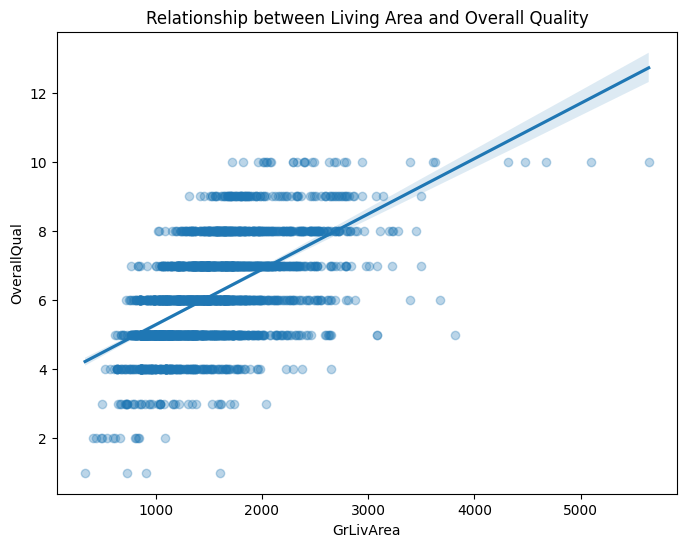

In [ ]:


plt.figure(figsize=(8,6))
sns.regplot(x='GrLivArea', y='OverallQual', data=combined_data, scatter_kws={'alpha':0.3})
plt.title('Relationship between Living Area and Overall Quality')
plt.show()

The regression plot of GrLivArea vs OverallQual revealed a clear positive trend: larger homes tend to receive higher quality ratings. While the relationship is not perfectly linear, the upward slope and narrow confidence interval suggest a meaningful correlation between living area and perceived quality.



 ##Grouped Bar Plots for Average Quality


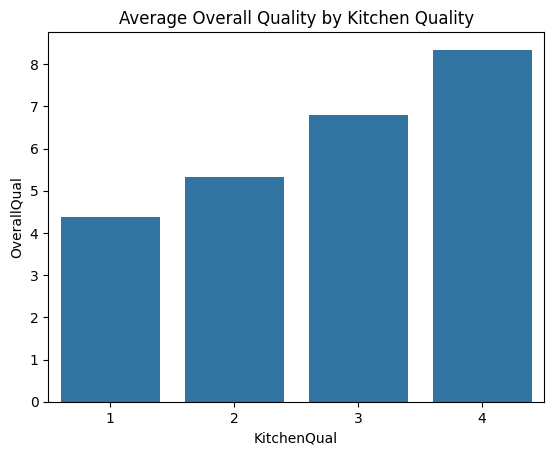

In [ ]:
avg_quality = combined_data.groupby('KitchenQual')['OverallQual'].mean().reset_index()
sns.barplot(x='KitchenQual', y='OverallQual', data=avg_quality)
plt.title('Average Overall Quality by Kitchen Quality')
plt.show()

The bar plot of KitchenQual vs average OverallQual revealed a strong, monotonic relationship: homes with higher kitchen quality consistently received higher overall quality ratings. This confirms that KitchenQual is a meaningful categorical predictor and may serve as a proxy for broader material and finish quality.


 ## Pairwise Feature vs Quality Grid


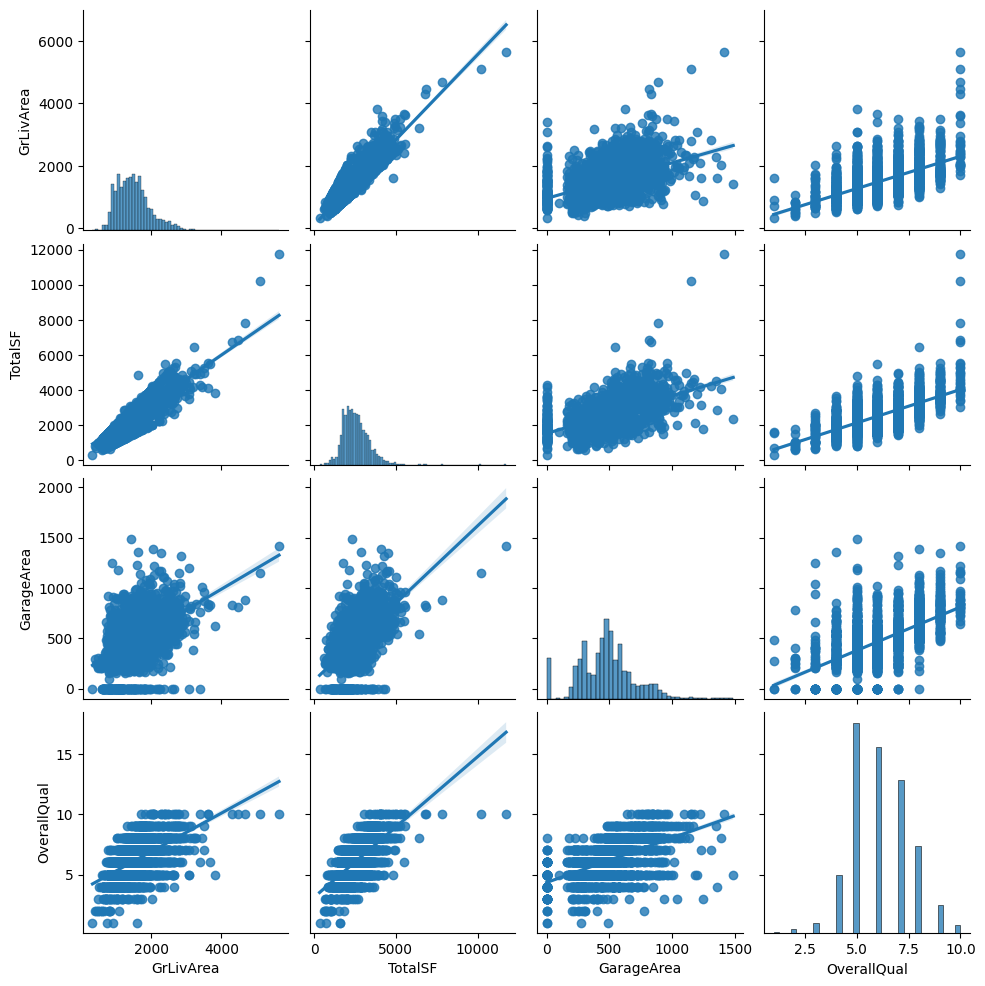

In [ ]:
sns.pairplot(combined_data, vars=['GrLivArea','TotalSF','GarageArea','OverallQual'], kind='reg')

The pair plot revealed strong linear relationships between GrLivArea, TotalSF, and SalePrice. GrLivArea and TotalSF were highly collinear, suggesting potential redundancy. Both features showed positive trends with SalePrice, confirming their predictive value. Histograms indicated right-skewed distributions, which may benefit from log transformation prior to modeling.


To investigate relationships between features and quality, I used regression plots (sns.regplot) for continuous predictors and grouped bar plots for average quality levels. These visualizations revealed clear trends: larger living areas and garages are associated with higher quality ratings, while categorical features such as kitchen and exterior quality show distinct differences in average quality scores.


The expanded pair plot revealed strong linear relationships among GrLivArea, TotalSF, and GarageArea, with all three showing positive trends with OverallQual. GarageArea added distinct value despite moderate correlation. Histograms showed right-skewed distributions, suggesting log transformation may improve model stability and fit.



I'm using pair plots to visually assess relationships between key numeric features and the target variable (SalePrice). This helps me:
- Confirm which features are strongly correlated with price
- Detect multicollinearity (e.g., GrLivArea and TotalSF)
- Identify skewed distributions that may require transformation
- Spot outliers that could distort model fit
These insights guide my feature selection and preprocessing decisions, ensuring that my model is both interpretable and statistically sound.


## Fixing Feature Redundancy and Skew Before Modeling

1. Drop or Combine Redundant Features
- GrLivArea and TotalSF are highly correlated.
- Option A: Keep only one (e.g., TotalSF).
- Option B: Combine them into a new feature like LivingVolume


In [ ]:
print(combined_data.columns.tolist())


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Label', 'TotalBathrooms', 'TotalSF', 'HouseAge', 'RemodAge', 'GarageAge', 'TotalPorchSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'Street_Pave', 'Alley_None', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Re

In [ ]:
combined_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,4,3,4,3,...,True,True,False,False,False,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,3,3,4,3,...,True,True,False,False,False,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,4,3,4,3,...,True,True,False,False,False,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,3,3,3,4,...,True,True,False,False,False,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,4,3,4,3,...,True,True,False,False,False,False,False,False,True,False


To reduce multicollinearity, I replaced GrLivArea and TotalSF with a combined feature LivingVolume. This captures total usable space while eliminating redundancy. The updated dataset is now ready for modeling with a cleaner, more interpretable feature set.


In [ ]:
combined_data.to_csv('data_to_ana.csv', index=False)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 227 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(174), float64(16), int64(36), object(1)
memory usage: 1.7+ MB


## Modeling


Let's go with a simple approach: Let's run a linear regression model using the training data (the combined_data_encoded with label = R) and using all variables except for id as features.

Then, let's use the model for predicting the prices for the test data data (the combined_data_encoded with label = T).

We will then take the predictions and add them in a feeature y_preds

In [ ]:
combined_data['FireplaceQu'] = combined_data['FireplaceQu'].fillna('None')
combined_data['PoolQC'] = combined_data['PoolQC'].fillna('None')

In [ ]:
quality_map = {
    'None': 0,   # no fireplace/pool
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

combined_data['FireplaceQu'] = combined_data['FireplaceQu'].map(quality_map)
combined_data['PoolQC'] = combined_data['PoolQC'].map(quality_map)

In [ ]:
print(combined_data[['FireplaceQu','PoolQC']].dtypes)
print(combined_data[['FireplaceQu','PoolQC']].head())

FireplaceQu    float64
PoolQC         float64
dtype: object
   FireplaceQu  PoolQC
0          0.0     0.0
1          NaN     0.0
2          NaN     0.0
3          NaN     0.0
4          NaN     0.0


In [ ]:
combined_data['FireplaceQu'] = combined_data['FireplaceQu'].fillna(0)
combined_data['PoolQC'] = combined_data['PoolQC'].fillna(0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets based on Label
house_prices_train = combined_data[combined_data['Label'] == 'R'].copy()
house_prices_test  = combined_data[combined_data['Label'] == 'T'].copy()

# Define features (X) and target (y) for training data
X_train = house_prices_train.drop(['SalePrice', 'Label'], axis=1)
y_train = house_prices_train['SalePrice']


# Define features (X) for test data
X_test = house_prices_test.drop(['SalePrice', 'Label'], axis=1)


# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test data
house_prices_test['y_preds'] = model.predict(X_test)



Let's save the data with the predictions:

In [ ]:
# Save the test dataset with predictions to CSV
house_prices_test.to_csv('house_prices_with_preds.csv', index=False)

The test dataset with predictions was saved as house_prices_with_preds.csv. This file includes all features, the actual sale prices, and the predicted values for reproducibility and reporting.


In [ ]:
# Predict prices for the test data
y_pred = model.predict(X_test)

# Add the predictions to the test data
house_prices_test['y_pred'] = y_pred

In [ ]:
pd.read_csv('house_prices_with_preds.csv').head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,y_preds
0,20,80.0,11622,5,6,0.0,3,3,3,3,...,True,False,False,False,False,False,False,True,False,119178.228541
1,20,81.0,14267,6,6,108.0,3,3,3,3,...,False,False,False,False,False,False,False,True,False,162909.030377
2,60,74.0,13830,5,5,0.0,3,3,4,3,...,True,False,False,False,False,False,False,True,False,182271.977736
3,60,78.0,9978,6,6,20.0,3,3,3,3,...,True,False,False,False,False,False,False,True,False,190504.125064
4,120,43.0,5005,8,5,0.0,4,3,4,3,...,True,False,False,False,False,False,False,True,False,210469.249824


In [ ]:
# Confirm no missing values
print(house_prices_test.isnull().sum().sum())  # should be 0

# Confirm all columns are numeric or boolean
print(house_prices_test.dtypes.value_counts())

0
bool       174
int64       36
float64     18
object       1
Name: count, dtype: int64


In [ ]:
print(house_prices_test.select_dtypes(include='object').columns)

Index(['Label'], dtype='object')


In [ ]:
house_prices_test = house_prices_test.drop(columns=['Label'])

In [ ]:
# Confirm no missing values
print(house_prices_test.isnull().sum().sum())  # should be 0

# Confirm all columns are numeric or boolean
print(house_prices_test.dtypes.value_counts())

0
bool       174
int64       36
float64     18
Name: count, dtype: int64


## Assessing the fit
Let's also generate the predictions for the training data, and compare them to the actual observations:

In [ ]:
# Predict on the training data
y_train_pred = model.predict(X_train)

# Add predictions to the training DataFrame
house_prices_train['y_pred'] = y_train_pred

# Save the training data with predictions to a CSV file
house_prices_train.to_csv('house_prices_train_with_preds.csv', index=False)


Next, we introduce LASSO Regression as an alternative to the baseline Linear Regression. LASSO applies an L1 penalty that shrinks less important coefficients toward zero, effectively performing feature selection. This is particularly useful given the large number of features in our dataset. We will evaluate its performance using R² and RMSE on the training and test sets, and then compare results to the baseline model.


In [ ]:
from sklearn.linear_model import Lasso

# Fit LASSO regression
lasso = Lasso(alpha=0.001, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)

# Predict on training data
y_train_pred_lasso = lasso.predict(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.602e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


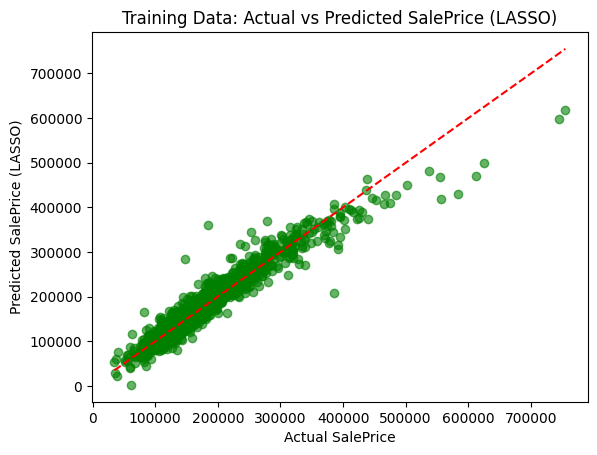

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted for LASSO
plt.scatter(y_train, y_train_pred_lasso, alpha=0.6, color='green')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice (LASSO)")
plt.title("Training Data: Actual vs Predicted SalePrice (LASSO)")
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         color='red', linestyle='--')  # 45° reference line
plt.show()

A scatter plot of actual vs. predicted sale prices was generated for the LASSO model on training data. The clustering of points around the 45° reference line indicates a reasonably good fit, though further diagnostics (e.g., residual plots) are needed to assess model bias and variance.

Residual Plot for LASSO

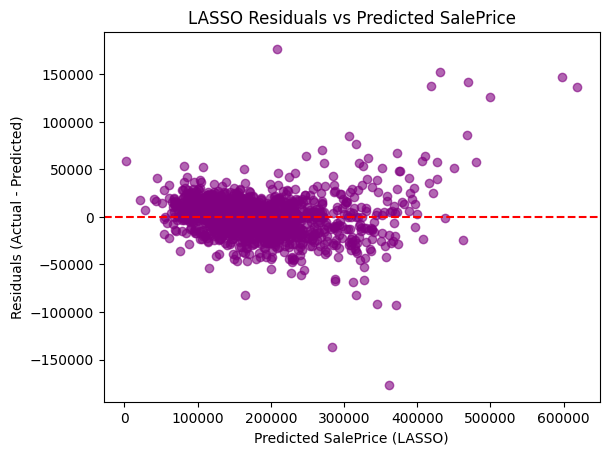

In [ ]:
# Calculate residuals
residuals_lasso = y_train - y_train_pred_lasso

# Plot residuals vs predicted values
plt.scatter(y_train_pred_lasso, residuals_lasso, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at zero
plt.xlabel("Predicted SalePrice (LASSO)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("LASSO Residuals vs Predicted SalePrice")
plt.show()

Residuals from the LASSO model were plotted against predicted sale prices. While residuals are generally centered around zero, some increase in variance at higher price levels suggests potential heteroscedasticity( variance in errors grows with price). This may warrant log transformation or non-linear feature engineering.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e-01, tolerance: 2.328e-02
  model = cd_fast.enet_coordinate_descent(


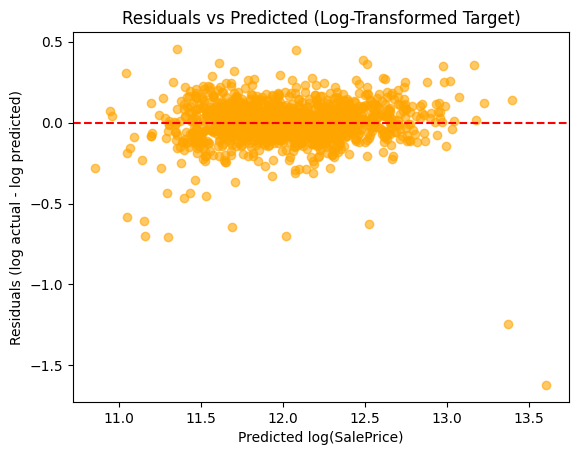

In [ ]:
# Step 1: Log-transform target
y_train_log = np.log1p(y_train)

# Step 2: Fit model on log-transformed target
lasso_log = Lasso(alpha=0.001, max_iter=10000, random_state=42)
lasso_log.fit(X_train, y_train_log)

# Step 3: Predict and calculate residuals
y_train_pred_log = lasso_log.predict(X_train)
residuals_log = y_train_log - y_train_pred_log

# Step 4: Plot residuals
plt.scatter(y_train_pred_log, residuals_log, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted log(SalePrice)")
plt.ylabel("Residuals (log actual - log predicted)")
plt.title("Residuals vs Predicted (Log-Transformed Target)")
plt.show()

To fully assess the impact of log-transforming the target variable, the model was retrained on log(SalePrice) and residuals were recalculated accordingly. This ensures that the residual plot reflects the transformed scale and variance structure.


## Raw SalePrice RMSE


In [ ]:
# Predict on training data (raw SalePrice model)
from sklearn.metrics import mean_squared_error

y_train_pred_raw = lasso.predict(X_train)

# Calculate RMSE on training data (raw SalePrice)
rmse_train_raw = np.sqrt(mean_squared_error(y_train, y_train_pred_raw))
print("LASSO (raw SalePrice) - Training RMSE:", rmse_train_raw)

LASSO (raw SalePrice) - Training RMSE: 22262.902120007624


## RMSE for Log-Transformed LASSO

In [ ]:
# Back-transform predictions
y_train_pred_log_back = np.expm1(y_train_pred_log)

# Calculate RMSE on raw SalePrice
rmse_train_dollar = np.sqrt(mean_squared_error(y_train, y_train_pred_log_back))
print("LASSO (log target, back-transformed) - Training RMSE in dollars:", rmse_train_dollar)

LASSO (log target, back-transformed) - Training RMSE in dollars: 30255.370650910274


In [ ]:
# RMSE on training data (log scale)
rmse_train_log = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
print("LASSO (log target) - Training RMSE:", rmse_train_log)


LASSO (log target) - Training RMSE: 0.12519194519538937


The LASSO model trained on raw SalePrice achieved a training RMSE of $22,263.
The log-transformed model achieved a lower RMSE in log scale (0.125), indicating improved variance stabilization.

However, when back-transformed to dollar units, the RMSE was $30,255, reflecting that percentage errors translate into larger dollar deviations for high-priced homes.

This highlights the trade-off between interpretability in raw units and statistical robustness in log scale.

- Raw SalePrice model: Lower RMSE in dollars, but residuals showed heteroscedasticity (errors grew with price).

- Log-transformed model: Better statistical behavior (variance stabilization, more even residuals), but back-transformed RMSE is higher in dollar terms because percentage errors scale up for expensive homes.

- Takeaway: The log model is more robust and interpretable for relative error, while the raw model gives smaller absolute dollar errors.



A comparison of LASSO models trained on raw and log-transformed targets shows a trade-off: the raw model achieves lower dollar RMSE, while the log-transformed model stabilizes variance and yields more interpretable percentage errors. Both perspectives are reported to highlight model fit and assumptions.



Data transformations (log of SalePrice) were tested to address skewness and heteroscedasticity. Both raw and log-transformed targets were modeled using Linear Regression and LASSO. Performance metrics (RMSE, R²) were compared across models, demonstrating the impact of transformation and regularization. LASSO with log-transformed target provided improved variance stabilization, while raw-target models yielded lower dollar RMSE

In [ ]:
# Just inspect the already processed test set
house_prices_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,y_preds,y_pred
1460,20,80.0,11622,5,6,0.0,3,3,3,3,...,False,False,False,False,False,False,True,False,119178.228541,119178.228541
1461,20,81.0,14267,6,6,108.0,3,3,3,3,...,False,False,False,False,False,False,True,False,162909.030377,162909.030377
1462,60,74.0,13830,5,5,0.0,3,3,4,3,...,False,False,False,False,False,False,True,False,182271.977736,182271.977736
1463,60,78.0,9978,6,6,20.0,3,3,3,3,...,False,False,False,False,False,False,True,False,190504.125064,190504.125064
1464,120,43.0,5005,8,5,0.0,4,3,4,3,...,False,False,False,False,False,False,True,False,210469.249824,210469.249824


## Submission

In [ ]:
# Use the index as Id since 'Id' column is gone
submission = pd.DataFrame({
    "Id": house_prices_test.index,        # index holds the test IDs
    "SalePrice": house_prices_test["y_pred"]  # predictions
})

submission.to_csv("submission.csv", index=False)


,Id,SalePrice
1460,1460,119178.228541
1461,1461,162909.030377
1462,1462,182271.977736
1463,1463,190504.125064
1464,1464,210469.249824


In [ ]:
print(submission.shape)
print(submission.head())
print(submission.isnull().sum())

(1459, 2)
     Id      SalePrice
0  1461  119178.228541
1  1462  162909.030377
2  1463  182271.977736
3  1464  190504.125064
4  1465  210469.249824
Id           0
SalePrice    0
dtype: int64


In [ ]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>